In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x_test = pd.read_csv('./test.csv')

In [3]:
train_data = pd.read_csv('./train.csv')

In [4]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
x_test.shape

(418, 11)

In [6]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_data.shape

(891, 12)

In [8]:
x_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

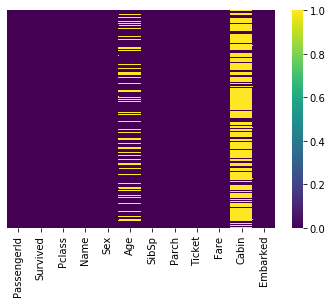

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False, cmap="viridis")

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


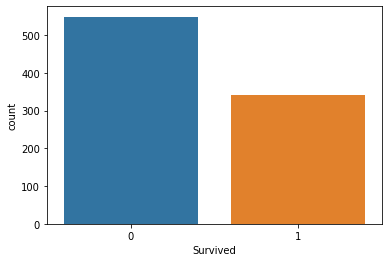

In [13]:
sns.countplot(x='Survived', data=train_data)

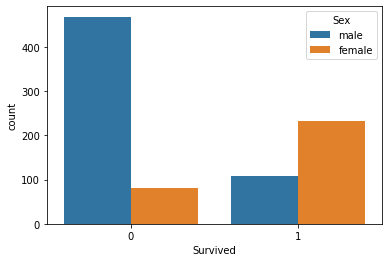

In [14]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

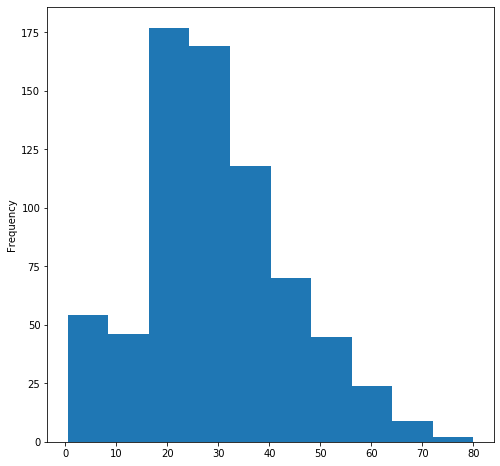

In [15]:
train_data['Age'].plot.hist(bins=10, figsize=(8,8))

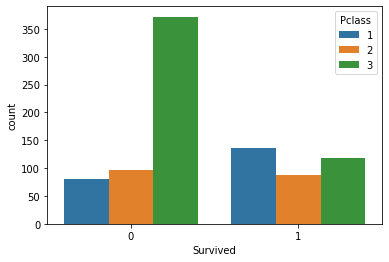

In [16]:
sns.countplot(x="Survived", hue='Pclass',data=train_data)

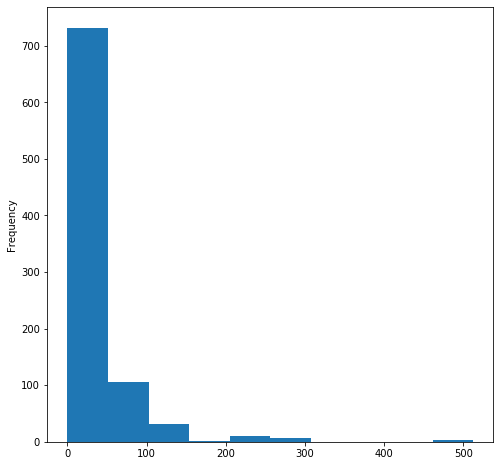

In [17]:
train_data['Fare'].plot.hist(bins=10, figsize = (8,8))

In [18]:
cols = ['Pclass', 'SibSp','Parch', 'Embarked']

In [19]:
n_rows = 2
n_cols = 2

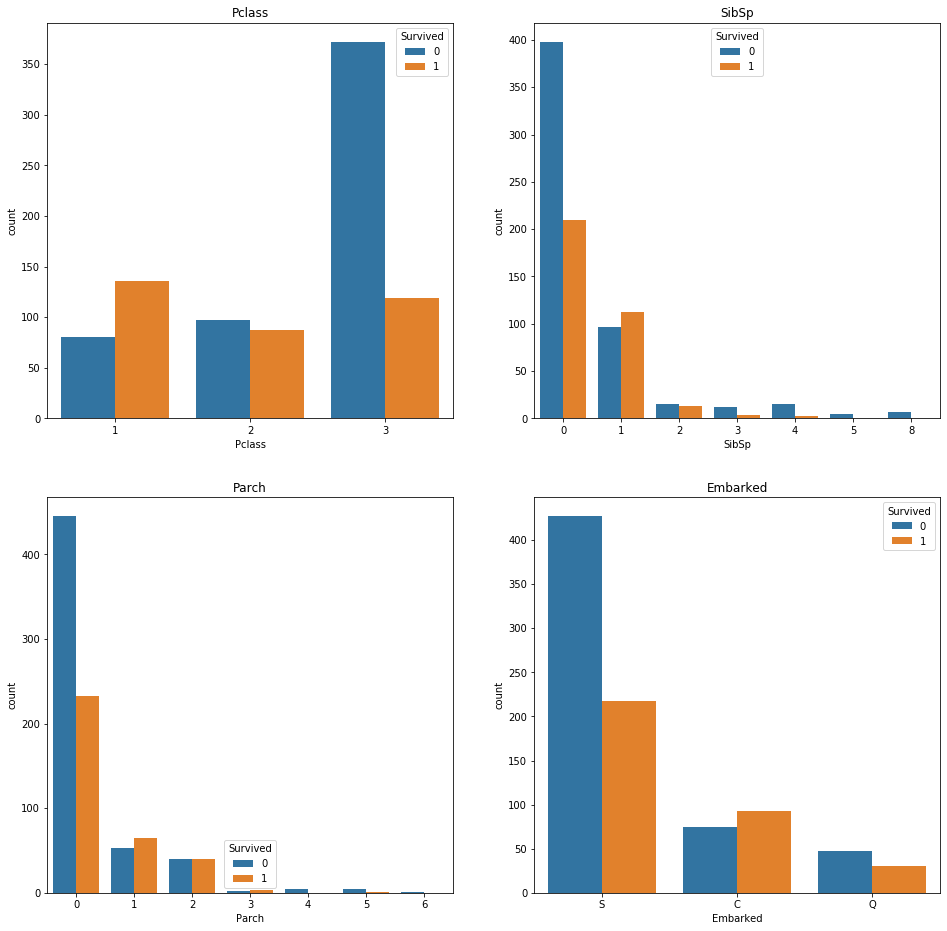

In [20]:
fig, axs = plt.subplots(n_rows,n_cols, figsize=(16,16))
for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+c
        ax = axs[r][c]
        sns.countplot(cols[i], hue='Survived', data=train_data, ax=ax)
        ax.set_title(cols[i])

In [21]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [22]:
train_data.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


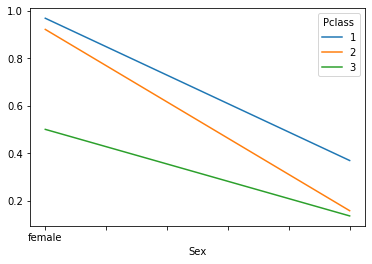

In [23]:
train_data.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

In [24]:
age = pd.cut(train_data['Age'], [0,18,30,80])

In [25]:
train_data.pivot_table('Survived', ['Sex', age], columns='Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 80]  0.980000  0.900000  0.304348
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 80]  0.360000  0.106383  0.112500

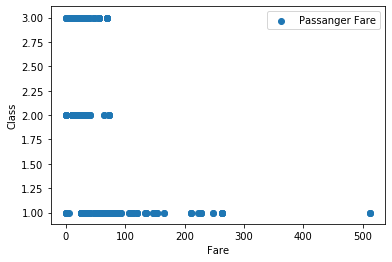

In [26]:
plt.scatter(train_data['Fare'],train_data['Pclass'], label='Passanger Fare')
plt.xlabel('Fare')
plt.ylabel('Class')
plt.legend()
plt.show()

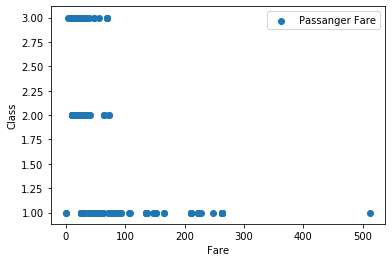

In [27]:
plt.scatter(x_test['Fare'],x_test['Pclass'], label='Passanger Fare')
plt.xlabel('Fare')
plt.ylabel('Class')
plt.legend()
plt.show()

In [28]:
train_data[train_data['Fare']==512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [33]:
col = train_data.drop(columns=['PassengerId', 'Name']).columns
for val in train_data[col]:
    print(train_data[val].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
347082              7
CA. 2343            7
1601                7
3101295             6
CA 2144             6
                   ..
382651              1
SOTON/OQ 3101317    1
36209               1
347064              1
A/5 21171           1
Name: Ticket, Length: 681, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
G6             4
C23 C25 C2

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

In [35]:
train_data.dropna(subset=['Embarked'], inplace = True)

In [36]:
train_data.groupby('Sex')['Age'].mean()

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

In [37]:
x_test.groupby('Sex')['Age'].mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [38]:
train_data['Age'].skew(skipna=True)

0.3888806178753708

In [39]:
x_test['Age'].skew(skipna=True)

0.4573612871503845

In [40]:
x_train = train_data.drop(columns=['Survived'])

In [41]:
y_train = train_data['Survived']
x_index = x_test['PassengerId']

In [42]:
def preprocessing(df):
    df.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket'], inplace=True)
    imp = SimpleImputer(missing_values=np.nan,strategy='median')
    imp.fit(df.iloc[:, 2:6])
    df.iloc[:, 2:6] = imp.transform(df.iloc[:, 2:6])
    labelencoder = LabelEncoder()
    df['Sex'] = labelencoder.fit_transform(df['Sex'])
    df['Embarked'] = labelencoder.fit_transform(df['Embarked'])   

In [43]:
preprocessing(x_train)

In [44]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.0,7.2500,2
1,1,0,38.0,1.0,0.0,71.2833,0
2,3,0,26.0,0.0,0.0,7.9250,2
3,1,0,35.0,1.0,0.0,53.1000,2
4,3,1,35.0,0.0,0.0,8.0500,2


In [45]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
preprocessing(x_test)

In [47]:
col = ['Age']
scaler = StandardScaler()
for c in col:
    scaler.fit(x_train[[c]])
    x_train[c] = scaler.transform(x_train[[c]])
    x_test[c] = scaler.fit_transform(x_test[[c]])

In [48]:
minmax = MinMaxScaler()

In [49]:
scaler.fit(x_train[['Fare']])
x_train['Fare'] = scaler.transform(x_train[['Fare']])
x_test['Fare'] = scaler.fit_transform(x_test[['Fare']])

In [50]:
print(x_test['Age'].skew(skipna=True))
print(x_train['Age'].skew(skipna=True))

0.5127105327530369
0.4343546516140885


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [52]:
log = LogisticRegression(max_iter=5000)

In [53]:
cv = KFold(n_splits=10, shuffle=True,random_state=0)

In [54]:
cross_val_score(log, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.7941905005107252

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scipy

In [67]:
clf = SVC(random_state=0)

In [68]:
cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.822344228804903

In [ ]:
#param_grid = [{'C':[0.1,1,10,100],'kernel':['linear']},
              {'C':[0.1, 10,100,1000,10000], 'gamma': [0.1,0.01], 'kernel': ['rbf']}]

In [ ]:
#grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')

In [ ]:
#grid.fit(x_train, y_train)

In [ ]:
#grid.best_params_

In [ ]:
#clf = SVC(C=1000, gamma = 0.01,kernel='rbf')

In [62]:
param_grid = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

In [69]:
grid = RandomizedSearchCV(clf,param_grid, cv=cv, scoring='accuracy')

In [70]:
grid.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=0,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000217FC9896C8>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000217FC9895C8>,
                                        'kernel': ['rbf']},
                   

In [71]:
grid.best_params_

{'C': 24.977510223965663,
 'class_weight': None,
 'gamma': 0.04339961201577343,
 'kernel': 'rbf'}

In [141]:
clf1 = SVC(C=24.9775, class_weight=None, gamma=0.0433996, kernel='rbf',random_state=0,probability=True)

In [142]:
clf1.fit(x_train,y_train)

SVC(C=24.9775, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0433996, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [143]:
cross_val_score(clf1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8268003064351378

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier()

In [85]:
cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8042773237997958

In [86]:
#param_grid = [{'n_neighbors' : list(range(3,15))}]

In [87]:
#list(range(3,15))

In [88]:
#grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')

In [89]:
#grid.fit(x_train,y_train)

In [90]:
#grid.best_params_

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)

In [92]:
cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8042773237997958

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
nb = GaussianNB()

In [95]:
cross_val_score(nb, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.7862870275791624

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier(random_state=0)

In [98]:
cross_val_score(dt, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.7739019407558734

In [99]:
#param_grid = [{'max_depth': np.linspace(1,32,32)}]

In [100]:
#grid = GridSearchCV(dt, param_grid, cv=cv, scoring='accuracy')

In [101]:
#grid.fit(x_train,y_train)

In [102]:
#grid.best_params_

In [103]:
dt1 = DecisionTreeClassifier(max_depth=6,random_state=0)

In [104]:
cross_val_score(dt1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8167517875383042

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier(random_state=0)

In [107]:
cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8188968335035749

In [108]:
#param_grid = [{'n_estimators':[30,32], 'max_depth': np.linspace(10,17,7), 'max_features': list(range(1, x_train.shape[1]))}]

In [109]:
#grid = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')

In [110]:
#grid.fit(x_train, y_train)

In [111]:
#grid.best_params_

In [112]:
rf1 = RandomForestClassifier(max_depth=11.1666,max_features=6, n_estimators=32,random_state=0)

In [113]:
cross_val_score(rf1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8414453524004086

In [114]:
from sklearn.ensemble import ExtraTreesClassifier

In [115]:
et = ExtraTreesClassifier(random_state=0)

In [116]:
cross_val_score(et, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.80426455566905

In [117]:
#param_grid = [{'n_estimators':[4,8,16], 'max_depth': np.linspace(1,17,17), 'max_features': list(range(1, x_train.shape[1]))}]

In [118]:
#grid = GridSearchCV(et, param_grid, cv=cv, scoring='accuracy')

In [119]:
#grid.fit(x_train, y_train)

In [120]:
#grid.best_params_

In [121]:
et1 = ExtraTreesClassifier(max_depth=11, max_features=4, n_estimators=8, random_state=0)

In [122]:
cross_val_score(et1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8312691521961184

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
adadt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, random_state=0),random_state=0)

In [125]:
cross_val_score(adadt, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.7975612870275791

In [126]:
#param_grid = [{'n_estimators':[8, 16, 32], 'learning_rate':[0.001,0.01]}]

In [127]:
#grid = GridSearchCV(adadt, param_grid, cv=cv, scoring='accuracy')

In [128]:
#grid.fit(x_train, y_train)

In [129]:
#grid.best_params_

In [174]:
adadt1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, random_state=0), 
                            learning_rate=0.01, n_estimators=16, random_state=0)

In [160]:
cross_val_score(adadt1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.789670582226762

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
gbc = GradientBoostingClassifier(random_state=0)

In [134]:
cross_val_score(gbc, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8302093973442288

In [135]:
#param_grid = [{'max_depth' : np.linspace(5,10, 5), 'max_features': list(range(3, x_train.shape[1]-1)), 
               #'n_estimators':[32, 50], 'learning_rate': [0.01, 0.1,1]}]

In [136]:
#grid = GridSearchCV(gbc, param_grid, cv=cv, scoring='accuracy')

In [137]:
#grid.fit(x_train, y_train)

In [138]:
#grid.best_params_

In [139]:
gbc1 = GradientBoostingClassifier(random_state=0, max_depth = 5, max_features = 5, n_estimators = 50, learning_rate = 0.1)

In [140]:
cross_val_score(gbc1, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.8403217568947907

In [144]:
from sklearn.ensemble import VotingClassifier

In [148]:
estimators = [('RandomForest', rf1), ('AdaBoost', adadt1), ('GradientBoosting', gbc1),('SVC',clf1),('ExtraTrees', et1), 
              ('DecisionTrees',dt1), ('kNN',knn)]

In [151]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [152]:
cross_val_score(vc, x_train, y_train, cv=cv, scoring='accuracy').mean()

0.842556179775281

In [175]:
adadt1.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [176]:
predict = adadt1.predict(x_test)

In [177]:
df1 = pd.DataFrame(predict,columns=['Survived'])

In [178]:
df = pd.DataFrame(x_index,columns=['PassengerId'])

In [179]:
df['Survived'] = df1

In [ ]:
df

In [180]:
df.to_csv('./Submission14.csv',index=False)